# Make directory

In [29]:
import os, glob #import libraries
# os.mkdir(r'line stuff')
os.chdir(r'C:\Users\UWAdmin\Documents\JakeHeil\Line Codes') #change the directory to read/write to

## Import libraries

In [30]:
import os 
os.getcwd() #get directory

'c:\\Users\\UWAdmin\\Documents\\JakeHeil\\Line Codes'

In [3]:
#connecting Laser via modbus
from pymeasure.instruments.lighthousephotonics import Sprout
laser_power = Sprout('COM4')
laser_power.adapter.connection.baud_rate = 19200
laser_power.adapter.connection.read_termination = '\r'
laser_power.adapter.connection.write_termination = '\r'
laser_power.power=0.01

c:\Users\UWAdmin\Anaconda3\lib\site-packages\pyvisa\highlevel.py:3355: FutureWarning: get_instrument is deprecated and will be removed in 1.12, use open_resource instead.
  FutureWarning,


In [49]:
from threading import Thread
import time
from time import sleep
from datetime import datetime, timedelta

from random import randrange

from newportxps import NewportXPS

import numpy as np
import pandas as pd
from write_utils import write_data_files, get_mean, get_move_y, duplicate_to_dataset

import numpy as np
import csv
        
from flipper import mirror #import flipper mirror codes
from spectra import capture_photo #import spectrometer codes

from pathlib import Path


## Activate Motion Controller

In [5]:
xpsd_remoteip = '192.168.254.254' #xps ip address
# xpsd_hostip ='192.168.0.254' 
hostname = 'XPS-1b81' #login host name

xps = NewportXPS(xpsd_remoteip) #connecting to the xps
print(xps.status_report()) #get xps status

xps.kill_group('XYZ') #clear XYZ group
xps.initialize_allgroups() #initialize addressing
xps.home_allgroups() #send control plate to origin

def pos_all():
    for sname, _ in xps.stages.items():
        print('{}: {}'.format(sname, xps.get_stage_position(sname)))

# XPS host:         192.168.254.254 (XPS-1B81)
# Firmware:         XPS-D-N13019
# Current Time:     Mon May 23 09:45:11 2022
# Last Reboot:      Thu Mar  3 14:04:11 2022
# Trajectory Group: XYZ
# Groups and Stages
XYZ (multipleaxesinuse), Status: Ready state from homing
   XYZ.X (MFA@MFA-CC@XPS-DRV11)
      Hardware Status: First driver powered on - ZM low level
      Positioner Errors: OK
   XYZ.Y (MFA@MFA-CC@XPS-DRV11)
      Hardware Status: First driver powered on - ZM low level
      Positioner Errors: OK
   XYZ.Z (MFA@MFA-CC@XPS-DRV11)
      Hardware Status: First driver powered on - ZM low level
      Positioner Errors: OK


In [6]:
xps.kill_group('XYZ')
xps.initialize_allgroups()
xps.home_allgroups()

pos_all()

XYZ.X: 8.8497e-05
XYZ.Y: 5.30982e-05
XYZ.Z: -1.76994e-05


## Turn on Laser

In [7]:
#turns on laser (does the same thing as pressing the on button)
laser_power.write("OPMODE=On")

# Launch the LightField / Spectrometer

In [8]:
from spectra import * #import library for the raman
capture_photo("start",2,1,0) #launch LightField software

# Vacuum the chamber

In [9]:
from pressure import close_valve,open_valve,close_all,current_pressure,gopr, to_ambient, to_vacuum, quick_fill
from pymeasure.instruments.edwards import NXDS


# connect to NXDS vacuum pump
pump = NXDS('ASRL5::INSTR')

current_pressure() #check current pressure

c:\Users\UWAdmin\Anaconda3\lib\site-packages\pyvisa\highlevel.py:3355: FutureWarning: get_instrument is deprecated and will be removed in 1.12, use open_resource instead.
  FutureWarning,


294

In [ ]:
from pressure import close_valve,open_valve,close_all,current_pressure,gopr, to_ambient, to_vacuum, quick_fill

In [10]:
t = 2 # in s
to_ambient()
time.sleep(1)
to_ambient()
to_vacuum(t)
quick_fill()
time.sleep(1)
to_vacuum(t)

1

In [14]:
close_all() #close all valves
current_pressure() #check current pressure
# gopr(20)

# run this block to make sure all valves are closed after vacuuming

2

In [ ]:
to_ambient() #open valve to atmosphere then close valve

# Adjust the pressure --- Don't do this anymore, focus under vacuum

In [ ]:
for i in range(5): gopr(120) #iterate through to get to 120psi
current_pressure()

In [ ]:
current_pressure() #check that there's no leaks (run a few times)

# Focus the laser. Use this block to adjust the z-axis to the position with maximum spectra intensity in LightField. When focus is found, enter 0 and confirm with "yes" to complete

In [16]:
mirror('on')

#Iterate for input to find z value
print("Enter z value (enter 0 when done):")
z=''
while z != 0:
    if z == '':
        z = float(input(':'))
    print(z)
    xps.move_stage('XYZ.Z', z)
    xps.move_stage('XYZ.X', 5)
    xps.move_stage('XYZ.Y', 7)
    z = float(input(':'))
    
# mirror('on')
pos_all()
while input('Is LightField Scan Stopped?:(yes/no)')!='yes':
    continue

MIRROR UP
Enter z value (enter 0 when done):
1.5
1.6
1.7
1.8
1.9
2.0
1.95
1.94
1.93
1.96
1.95
1.94
1.95
XYZ.X: 4.999992003
XYZ.Y: 7.0000065036
XYZ.Z: 1.9499959962


In [ ]:
#mirror("on")
mirror("off") #use when z has been focused

# Control the laser power and switch on/off the mirror

In [ ]:
laser_power.power=0.01

In [ ]:
 # from flipper import mirror
mirror("on")

# mirror("off")

In [ ]:
 mirror("off")

# Option 1: Prepare initial Data --- Skip to Option 2

In [ ]:
 #Dont run, go to option 2
power=[]
time=[]
pressure=[]
gas=[]
print("Enter number of initial samples: ")
n=int(input())
for x in range(n):
    powr=randrange(160,2000,10) # in mW
    tm=randrange(1050,5000,1) # in ms
    pr=randrange(300,400,10) # in psi
    for i in range(9):
        power.append(powr)
        time.append(tm)
        pressure.append(pr)

    
from datetime import date

p=str(date.today())
# path=r'C:\Users\UWAdmin\line stuff'
import os
# os.chdir(path)
# os.mkdir('Campaign ' + p)
# os.chdir('Campaign ' + p)
row=['power','time','pressure','ratio']



with open('dataset.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(row)
        writer.writerows(zip(power,time,pressure))

        
with open('dataset-pre.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(row)
        writer.writerows(zip(power,time,pressure))

# os.chdir(path)

df2=pd.read_csv('dataset.csv')
df2=df2.drop_duplicates()
df2.head()
df2.to_csv('data.csv',index=False)

# Option 2: customize your dataset

In [ ]:
df=pd.DataFrame(columns=['power','time','pressure','ratio'])
df.to_csv('data.csv',index=False)

In [17]:
 # os.chdir(r'C:\Users\UWAdmin\line stuff')
os.getcwd()

'c:\\Users\\UWAdmin\\Documents\\JakeHeil\\Line Codes'

# (G) Define coordinate details --- Don't use yet

**Takes input for**  
  
-number of lines

-starting position of x

-starting position of y

-vertical gap/step size

In [ ]:
lines, start_y, step_y = 2, 7, 4
move_y = get_move_y(lines, start_y, step_y)
print("Lines will be made at following y axis:", move_y,"\n")

## THREADING

In [18]:
#Change this to motion_thread
class MotionThread(Thread):
   
    def run(self):
        import pandas as pd
        d = pd.read_csv('foreward.trj',header=None) # scantime 2 (see segment 1 or row1)
        d = d.loc[:, (d != 0).any(axis=0)] # remove last 3 cols with 0
        d.columns = ['ramptime','rampdist','rampvel']
        total_time=np.sum(d['ramptime'])
        
        if d['ramptime'][0]<0.5:
            time.sleep(.5-d['ramptime'][0])
        print("MOTION THREAD\n")
        print("XPS run trajectory")
        xps.run_trajectory('foreward',)
        print('Total time {} in class'.format(total_time))
        time.sleep(total_time)
        print("TOTAL_TIME DONE, LASER 0.05W")
        laser_power.power=0.01
        print("finished and current position is:\n")
        pos_all()

#Change this to mirror_thread
class MirrorThread(Thread):
    """MOTOR THREAD"""
    def run(self):
        import pandas as pd
        d = pd.read_csv('foreward.trj',header=None) # scantime 2 (see segment 1 or row1)
        d = d.loc[:, (d != 0).any(axis=0)] # remove last 3 cols with 0
        d.columns = ['ramptime','rampdist','rampvel']
        mirror_sleep=d['ramptime'][0]-.5
        print("MIRROR THREAD")
        for i in range(2):
            if i==0:
                print(d['ramptime'][0])
                if d['ramptime'][0]<0.5:
                    print("mirror on")
       
                    start_time = time.monotonic()
                    mirror('on')
       
                    end_time = time.monotonic()
                    print(timedelta(seconds=end_time - start_time))
                    time.sleep(d['ramptime'][1]) #time for linear line    

                else:
                    print('{} > 0.5'.format(d['ramptime'][0]))
                    print('Mirror sleep {} in class'.format(mirror_sleep))
                    time.sleep(mirror_sleep)
                
                    print("mirror on")
                    start_time = time.monotonic()
                    mirror('on')
                    end_time = time.monotonic()
                    print(timedelta(seconds=end_time - start_time))
                    time.sleep(d['ramptime'][1]) #time for linear line
            else:
                mirror('off')
                print("mirror off")

# Begin the experiment -----****** NOT READY YET. need to figure out how to add parameters into this rather than having random/MBO proposed params. SKIP TO SECTION (A) for now

In [ ]:
col = 1
TOTAL_LINES = len(move_y)
steps = 0
for move_line in range(TOTAL_LINES):
        # print("For this print this is line #: ",move_line)
        # print("Experiment Line number: " ,move_line)
        
        save_line = col*TOTAL_LINES + move_line
        steps = save_line * 9
        print (f"before: {move_line}, {save_line}, {steps}")
        
        # print (f"after : {move_line}, {save_line}, {steps}")

In [ ]:
def main_experiment(startx: float, move_y: list, col: int) -> None:
    """Starts the experiment. Currently works ok with equal length of col1 and col2 lines.
       startx: Starting position on the x-axis
       starty: Starting position on the y-axis
       step_y: The distance between lines on the y-axis
       move_y: List of positions on the y-axis
       col_no: Defines the column number"""

    # line_name_start = col_no*len(move_y) #0,1,   # What the first line # will be named
    # line_name_end = line_name_start + len(move_y) #What the last line # will be named
    
    import pandas as pd
    print(f'LOADING DATA.CSV FOR COLUMN: {col}') 
    df2 = pd.read_csv('data.csv')   # to avoid pd referenced before assignment
    print (df2)
    
    print("EXPERIMENT IS STARTING\n")
    import time
    time.sleep(5)
    _MIRROR_MOVE_TIME = .5
    _LINE_LENGTH = 2
    VACUUM_TIME = 0.5 # in minutes

    #set this to zero!!!!!!!
    #starting_line = 4
    STARTING_LINE = 0
    _SPOTS_MEASURED = 9
    TOTAL_LINES = len(move_y) #+STARTING_LINE
    RANDOM_LINES = 7
    TARGET = 'GD'

    print(f"Here's the number of total lines:{TOTAL_LINES}")
    
    for move_line in range(STARTING_LINE,TOTAL_LINES):
        print(f"====== MOVE LINE: {move_line} ======")
        
        save_line = col * TOTAL_LINES + move_line
        steps = save_line * _SPOTS_MEASURED
        print(f"====== SAVE LINE: {save_line} ======")

        # move the axes to their start position
        xps.move_stage('XYZ.Y',move_y[move_line])
        pos_all()
        print("\n\n")
        df2 = pd.read_csv('data.csv')
        plot_data_df = pd.read_csv('plot_data.csv')
        print(f"\n data.csv file before index {save_line}:\n")
        print(df2)
        print(f"\n plot_data.csv file before index {save_line}:\n")
        print(plot_data_df,'\n')
        # line = df2['ratio'].count() #find in data.csv what line number we're on
        
        # set time
        time_of_file = df2['time'][save_line]
        print(f"\nCurrent patterning time is: {time_of_file} ms")

        # vacuum-infill
        print("Vacuum-infill in progress...")
        # t = 1 # in minutes
        to_ambient()
        print(f"1st ambient: {current_pressure()}")
        time.sleep(1)
        to_ambient()
        print(f"2nd ambient: {current_pressure()}")
        time.sleep(1)
        to_ambient()
        print(f"3rd ambient: {current_pressure()}")
        time.sleep(5)
        to_vacuum(VACUUM_TIME)
        print(f"1st vac: {current_pressure()}")
        time.sleep(5)
        quick_fill()
        print(f"After quick_fill: {current_pressure()}")
        time.sleep(1)
        to_ambient()
        print(f"3rd ambient: {current_pressure()}")
        time.sleep(2)
        to_vacuum(VACUUM_TIME)
        time.sleep(5)
        print(f"2nd vac : {current_pressure()}")
        
        # set pressure
        pressure_of_file=df2['pressure'][save_line]
        for j in range(3):
            gopr(pressure_of_file)
            close_all()
            time.sleep(5)
        print(f"\n Pressure is now :{pressure_of_file}\n")

        xps.define_line_trajectories(start=float(startx),
                                 stop=float(startx)+_LINE_LENGTH,
                                 step=0.01,
                                 scantime=(time_of_file/1000),
                                 axis='X')
        # downloads trajectory defined above
        xps.download_trajectory('foreward.trj')
        import pandas as pd
        d = pd.read_csv('foreward.trj', header=None) # scantime 2 (see segment 1 or row1)
        d = d.loc[:, (d != 0).any(axis=0)] # remove last 3 cols with 0
        d.columns = ['ramptime','rampdist','rampvel']
        print(d)

        total_time = np.sum(d['ramptime'])
        mirror_sleep = d['ramptime'][0] - _MIRROR_MOVE_TIME
        print(f'Total time: {total_time}, Mirror_sleep: {mirror_sleep} in MAIN')

        # power will be set to assigned value, make sure mirror is OFF (!) \
        # and power is given enough time to reach it's value

        power_of_file = df2["power"][save_line]

# PATTERN EXPERIMENT

        print("Power is now: {} mW".format(power_of_file))
        xps.move_stage('XYZ.X',(float(startx) - d['rampdist'][0]))
        pos_all()
        time.sleep(15)
        print("\n\n")
        mirror("off")
        a=power_of_file
        #laser_power.power=((a-5.7488)/0.138859)/1000
        laser_power.power = (a/0.0994)/1000
        time.sleep(15)
        
        
        print("###### Starting pattern in 5 seconds! #########")
        ##Draw Lines
        time.sleep(10)
        
        import sys
        motion_thread=MotionThread() # MOTION THREAD
        mirror_thread=MirrorThread() # MIRROR THREAD
        # stop_threads = False
        motion_thread.start()
        mirror_thread.start()

        motion_thread.join()
        mirror_thread.join()

        time.sleep(10)
        print("\n Job done\n")

        ##raman spectra analysis
        laser_power.power=0.01
        time.sleep(15)

    ########################################

    # post patterning raman analysis

        check=[float(startx) + .2*_LINE_LENGTH, \
                float(startx) + .4*_LINE_LENGTH, \
                float(startx) + .6*_LINE_LENGTH]
        # mm=0
        for spot in range(3):
            print(f"############### SPOT {spot} ##################")
            xps.move_stage('XYZ.X',check[spot])
            print(pos_all())

            for iii in range(3):
                print(f"############# iteration {iii} ###############")
                mirror("on")
                #writing G/D of 3 spots in 3 lines inside dataset.csv
        #         capture_photo("on",spot,line)
                print(f"Measuring patterned line for {TARGET}")
                GD = capture_photo("on", spot, save_line, iii, target=TARGET)

                mirror("off")
                time.sleep(5) 

        if save_line <= RANDOM_LINES-1:
            print(f"############# LINE {save_line} <= 3, CURRENT_STEP={steps}, TAKING MEAN: #############")
           take_mean(steps, save_line)     

## Section (A) : Insert line number, parameters for the line and then define the line coordinate details

In [33]:
path = Path(r'c:\\Users\\UWAdmin\\Documents\\JakeHeil\\Campaigns\\TiO2_Capacitors\\Sample1')

In [39]:
campaign_path = path / "Bottom_layer_Line1"
os.chdir(campaign_path)

#os.chdir(r'C:\Users\UWAdmin\line stuff')
from fits import new_plot_LIG

#Please remember indexing begins from 0.

df=pd.read_csv('data.csv')
print("Enter Line Number: ")
#line_no=int(input())
line_no=int(input())

print("Enter your power, time, pressure for line number ", line_no)
powr,tm,pr=input().split()

df.loc[line_no,'power']=powr
df.loc[line_no,'time']=tm
df.loc[line_no,'pressure']=pr

df.to_csv('data.csv',index=False)


power=[]
time=[]
pressure=[]
for i in range(9):
        power.append(powr)
        time.append(tm)
        pressure.append(pr)

row=['power','time','pressure','ratio']
with open('dataset.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        if line_no==0:writer.writerow(row)
        writer.writerows(zip(power,time,pressure))

        
with open('dataset-pre.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        if line_no==0:writer.writerow(row)
        writer.writerows(zip(power,time,pressure))

Enter Line Number: 
Enter your power, time, pressure for line number  0


# Section (B) : Positional Parameters for Line

In [40]:

print("Enter number of lines, starting point for x axis, y axis and step size for y axis:")


#lines,startx,starty,step_y= [x for x in input().split()]
lines,startx,starty,step_y = [1,2.5,11,1]
print(lines,startx,starty,step_y)
# move_y=[0 for i in range(int(lines))]

move_y=float(starty)

print("Lines will be made at following y axis:",move_y,"\n")



Enter number of lines, starting point for x axis, y axis and step size for y axis:
1 2.5 11 1
Lines will be made at following y axis: 11.0 



# Section (C) : Pattern LIG Line

In [41]:
df2=pd.read_csv('data.csv')
print("Patterning is to be started\n")
import time
time.sleep(5)
cc=0
steps=0

for i in range(line_no,line_no+1):
    print("Line number: ",i) # row idx in data.csv
    current_line=i
    laser_power.power=0.01
    
    #move the axes to their start position
    xps.move_stage('XYZ.Y',move_y)
    pos_all()
    print("\n\n")
    df2=pd.read_csv('data.csv')
    time_of_file=df2['time'][i]
    #scantime=time_of_file/1000
    
    #define the trajectory
    length = 5 # Change number to alter line length (length is in mm)
    xps.define_line_trajectories(start=float(startx),
                             stop=float(startx)+length, 
                             step=0.01,
                             scantime=(time_of_file/1000),
                             axis='X') # Pos1
    
    print("\nCurrent time is:",time_of_file)
        
    pressure_of_file=df2['pressure'][i]
    for ip in range(5):gopr(pressure_of_file)

    print("\n Pressure is now : ",pressure_of_file,"\n")
    
#     k+=3
    xps.download_trajectory('foreward.trj')
    import pandas as pd
    d = pd.read_csv('foreward.trj',header=None) # scantime 2 (see segment 1 or row1)
    d = d.loc[:, (d != 0).any(axis=0)]
    d.columns = ['ramptime','rampdist','rampvel']

    total_time=np.sum(d['ramptime'])
    mirror_sleep=d['ramptime'][0]-.5
    
    print(d)
    
    
    #power will be set to assigned value and make sure mirror is off and power is given enough time to reach it's value
    power_of_file=df2["power"][i]
#     ij=3 # wtf is this

##################

#     print("pre-pattern checking\n")
 #   check=[(float(startx)+.4),float(startx)+.8,(float(startx)+1.2)]
#     a=0.19 # what is this 
#     check=[ float(startx)+(a*i)+0.1 for i in range(10)]

#     check=[float(startx)+length/10*i for i in range(1,10)]
#     mm=0
#     for kk in range(3):
#         xps.move_stage('XYZ.Pos1',check[kk])
#         print(pos_all())
        
#         for iii in range(3):
#             mirror("on")
#             #writing G/D of 3 spots in 3 lines inside dataset.csv
#     #         capture_photo("on",kk,line)
#             print("hey")
#             GD=capture_photo("first",kk,line,iii)

#             mirror("off")
#             time.sleep(5)
    
 
############### 

#     print("pre-pattern checking done\n")
    print("power is now:",power_of_file)

    xps.move_stage('XYZ.X',(float(startx)-d['rampdist'][0]))
    pos_all()
    time.sleep(15)
    print("\n\n")
    mirror("off")
    pp=power_of_file
#    laser_power.power=(0.5178*a-5.2215)/1000
#    laser_power.power=((a+5.2215)/0.5178)/1000
#    laser_power.power=((pp+21.167)/0.1013)/1000
    laser_power.power=((pp-5.7488)/0.138859)/1000
    
    time.sleep(15)
    
    ##Draw Lines
    time.sleep(5)
    
    print("patterning!")
    import sys
    motion_thread=MotionThread()
    mirror_thread=MirrorThread()
    # stop_threads = False
    motion_thread.start()
    print('a started')
    mirror_thread.start()
    print('b started')
    
    
    motion_thread.join()
    print('a joined')
    mirror_thread.join()
    print('b joined')
    
    time.sleep(10)
    print("\n Line drawn - END\n")
    
    
    
    ##raman spectra analysis
    laser_power.power=0.01
    time.sleep(15)
    
#     print("line drawn, post-pattern not done yet")


Patterning is to be started

Line number:  0
XYZ.X: 4.999992003
XYZ.Y: 11.000000106
XYZ.Z: 1.9499959962




Current time is: 5000
done
done
done
done
done

 Pressure is now :  120 

   ramptime  rampdist  rampvel
0      0.60      0.60      1.0
1      5.01      5.01      1.0
2      0.60      0.60      0.0
power is now: 380
XYZ.X: 1.9003137804
XYZ.Y: 11.000000106
XYZ.Z: 1.9499959962



MIRROR DOWN
patterning!
a started
b started
MOTION THREAD

XPS run trajectory
MIRROR THREAD
0.6
0.6 > 0.5
Mirror sleep 0.09999999999999998 in class
mirror on
MIRROR UP
0:00:00.282000
MIRROR DOWN
mirror off
Total time 6.209999999999999 in class
TOTAL_TIME DONE, LASER 0.05W
finished and current position is:

XYZ.X: 8.1099889758
XYZ.Y: 11.000000106
XYZ.Z: 1.9499959962
a joined
b joined

 Line drawn - END



In [46]:
 #Dont run
i=0
one=[]
file=[]
bg=[]
fit=[]

a="line "
b=str(i)+"*.csv"
c=a+b
for file in glob.glob(c):one.append(f"{file}")
for file in glob.glob("background*.csv"):bg.append(f"{file}")  

one

['line 0 Point 0 iteration 0 foreground1D.csv',
 'line 0 Point 0 iteration 0 foreground2D.csv']

In [ ]:
 #Dont run
import pandas as pd
from fits import new_plot_LIG

increment=0
line_number=i
for ix in range(int(len(one)/2)):
    d1 = pd.read_csv(one[increment])
    d2 = pd.read_csv(one[increment+1])
    _d1 = pd.read_csv(bg[0])
    _d2 = pd.read_csv(bg[1])
    increment+=2
    f=new_plot_LIG(d1,d2,_d1,_d2, ix, 0, line_number) # ix - Point; iteration=0 ; 
    print(ix)
    fit.append(f) 

In [55]:
 os.getcwd()

'c:\\Users\\UWAdmin\\Documents\\JakeHeil\\Campaigns\\TiO2_Capacitors\\Sample1\\Bottom_layer_Line1'

In [60]:
 from spectra import *
 from spectra import capture_photo #import spectrometer codes

In [ ]:
#path = Path(r'C:\Users\UWAdmin\Documents\JakeHeil\Campaigns\TiO2_Capacitors\Sample1')

line drawn, post pattern starts
XYZ.X: 2.9999952018
XYZ.Y: 11.000000106
XYZ.Z: 1.9499959962
None
MIRROR UP
post patterning...
Running before
 >>>> measuring line: 0 spot: 0, iteration: 0 @ 1D region <<<<
 
 >>>> measuring line: 0 spot: 0, iteration: 0 @ 2D region <<<<
 
Extracting GD to dataset.csv
Running after
MIRROR DOWN
MIRROR UP
post patterning...
Running before
 >>>> measuring line: 0 spot: 0, iteration: 1 @ 1D region <<<<
 
 >>>> measuring line: 0 spot: 0, iteration: 1 @ 2D region <<<<
 
Extracting GD to dataset.csv
Running after
MIRROR DOWN
MIRROR UP
post patterning...
Running before
 >>>> measuring line: 0 spot: 0, iteration: 2 @ 1D region <<<<
 
 >>>> measuring line: 0 spot: 0, iteration: 2 @ 2D region <<<<
 
Extracting GD to dataset.csv
Running after
MIRROR DOWN
XYZ.X: 3.4997731596
XYZ.Y: 11.000000106
XYZ.Z: 1.9499959962
None
MIRROR UP
post patterning...
Running before
 >>>> measuring line: 0 spot: 1, iteration: 0 @ 1D region <<<<
 
 >>>> measuring line: 0 spot: 1, iteration

c:\Users\UWAdmin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0
Populating the interactive namespace from numpy and matplotlib
1
Populating the interactive namespace from numpy and matplotlib
2
Populating the interactive namespace from numpy and matplotlib
3
Populating the interactive namespace from numpy and matplotlib
4
Populating the interactive namespace from numpy and matplotlib
5
Populating the interactive namespace from numpy and matplotlib
6
Populating the interactive namespace from numpy and matplotlib
7
Populating the interactive namespace from numpy and matplotlib
8
Populating the interactive namespace from numpy and matplotlib
9
Populating the interactive namespace from numpy and matplotlib
10
Populating the interactive namespace from numpy and matplotlib
11
Populating the interactive namespace from numpy and matplotlib
12
Populating the interactive namespace from numpy and matplotlib
13
Populating the interactive namespace from numpy and matplotlib
14
done


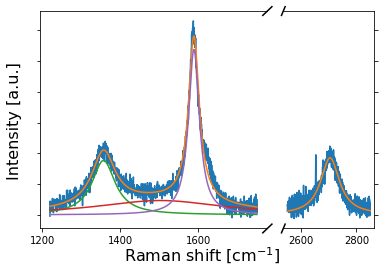

In [69]:
#campaign_path = path / "Bottom_layer_Line1"
#os.chdir(campaign_path)

print("line drawn, post pattern starts")
# check=[(float(startx)+2),float(startx)+4,(float(startx)+6)]
length=5
check=[float(startx)+length/10*i for i in range(1,10)]

for spot in range(3):
    #spot is for incrementing index
    
    xps.move_stage('XYZ.X',check[spot])
    print(pos_all())

    for iii in range(3):
        mirror("on")
        #writing G/D of 3 spots in 3 lines inside dataset.csv
#         capture_photo("on",spot,line)
        print("post patterning...")
        print("Running before")
        GD=capture_photo("on",spot,line,iii)
        print("Running after")

        mirror("off")
        time.sleep(5)     
        

 ### The following code saves spectra by reading the csv files. 
 ### For example: if current line number is 3, following codes will find the csvs that start with " line 0 ..." and will  
 ### save raman spectra for all the files whose name starts with line 0        
        
import glob
import pandas as pd


one=[]
bg=[]
fit=[]


a="line "
b=str(i)+"*.csv"
c=a+b
for file in glob.glob(c):one.append(f"{file}")
for file in glob.glob("background*.csv"):bg.append(f"{file}")    
print(len(one))

###################### Gets average from dataset.csv and inserts into data.csv
filled_cols = [0]
TOTAL_LINES = 1
SPOTS_MEASURED = 9

for col in filled_cols:
    for move_line in range(TOTAL_LINES):
        save_line = col*TOTAL_LINES + move_line
        steps = save_line * SPOTS_MEASURED
        # get_mean(steps, save_line, spots_measured = SPOTS_MEASURED, target='ratio')
        get_mean(steps, save_line, spots_measured = SPOTS_MEASURED, target='ratio')
        print (f"before: {move_line}, {save_line}, {steps}")

increment=0
line_number=i
for ix in range(int(len(one)/2)):
    d1 = pd.read_csv(one[increment])
    d2 = pd.read_csv(one[increment+1])
    _d1 = pd.read_csv(bg[0])
    _d2 = pd.read_csv(bg[1])
    increment+=2
    f=new_plot_LIG(d1,d2,_d1,_d2, ix, 0, line_number)
    print(ix)
    fit.append(f)

    
    
print("done")

In [73]:
# TODO: double-check cols pair are correct and correspond to filled dataset, else overwrite possible
filled_cols = [0]
TOTAL_LINES = 1
SPOTS_MEASURED = 9

for col in filled_cols:
    for move_line in range(TOTAL_LINES):
        save_line = col*TOTAL_LINES + move_line
        steps = save_line * SPOTS_MEASURED
        # get_mean(steps, save_line, spots_measured = SPOTS_MEASURED, target='ratio')
        get_mean(steps, save_line, spots_measured = SPOTS_MEASURED, target='ratio')
        print (f"before: {move_line}, {save_line}, {steps}")

c:\Users\UWAdmin\Documents\JakeHeil\Campaigns\TiO2_Capacitors\Sample1\Bottom_layer_Line1
Filling nans with 0
saving mean 4.785232736888889 to data.csv
before: 0, 0, 0


In [ ]:
laser_power.write("OPMODE=Off")

In [ ]:
laser_power.write("OPMODE=On")

In [ ]:
to_ambient()

In [ ]:
mirror("off")

In [ ]:
mirror("on")

In [ ]:

# power_of_file=df2["power"][i]
ij=3
laser_power.power=0.01
power_of_file=380
print("power is now:",power_of_file)
xps.move_stage('XYZ.X',(float(startx)-d['rampdist'][0]))
pos_all()
time.sleep(15)
print("\n\n")
mirror("off")
a=power_of_file
laser_power.power=(0.5178*a-5.2215)/1000

In [ ]:
In[135]

In [ ]:
mirror("off")

In [ ]:
pos_all()

In [ ]:
mv=float(mv)
type(mv)

In [ ]:
# rsum=robjects.r['sourin']
# rsum((1))
write_more()
repeats()

In [ ]:
os.getcwd()

In [ ]:
def write_more():
    d=pd.read_csv('data.csv')
    ln=d.shape[0]

    vpower=d['power'][ln-1]
    vtime=d['time'][ln-1]
    vpressure=d['pressure'][ln-1]

    d1=pd.read_csv('dataset.csv')
    ln=d1.shape[0]
    d1.loc[ln,"power"]=vpower
    d1.loc[ln,"time"]=vtime
    d1.loc[ln,"pressure"]=vpressure
    d1.to_csv('dataset.csv',index=False)
    d1.to_csv('dataset-pre.csv',index=False)

In [ ]:
time_of_file=8554/1000
xps.define_line_trajectories(start=float(startx),
                             stop=float(startx)+2,
                             step=0.01,
                             scantime=time_of_file,
                             axis='X') # Pos1

xps.download_trajectory('foreward.trj')
import pandas as pd
d = pd.read_csv('foreward.trj',header=None) # scantime 2 (see segment 1 or row1)
d = d.loc[:, (d != 0).any(axis=0)]
d.columns = ['ramptime','rampdist','rampvel']

d

In [45]:
import glob
import pandas as pd
from fits import new_plot_LIG

one=[]
bg=[]
fit=[]


a="line "
b=str(i)+"*.csv"
c=a+b
for file in glob.glob(c):one.append(f"{file}")
for file in glob.glob("background*.csv"):bg.append(f"{file}")    
print(len(one))

increment=0
line_number=i
for ix in range(int(len(one)/2)):
    d1 = pd.read_csv(one[increment])
    d2 = pd.read_csv(one[increment+1])
    _d1 = pd.read_csv(bg[0])
    _d2 = pd.read_csv(bg[1])
    increment+=2
    f=new_plot_LIG(d1,d2,_d1,_d2,ix,line_number)
    print(ix)
    fit.append(f)    



2


TypeError: new_plot_LIG() missing 1 required positional argument: 'line_number'